In [2]:
import pandas as pd
import matplotlib.pyplot as plt

train =pd.read_csv('C:/Users/JH/Desktop/adjtrain.csv')
test = pd.read_csv('C:/Users/JH/Desktop/adjtest.csv')

In [3]:
train.isin([0]).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

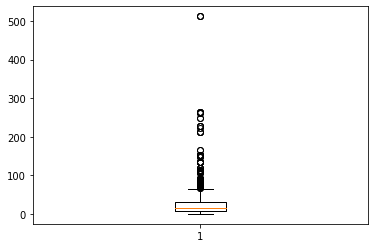

In [4]:
plt.boxplot(train['Fare'])
plt.show()

In [5]:
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
train['Fare'] = train['Fare'].astype(int)

#### 이상치 제거

In [7]:
Q3 = train['Fare'].quantile(.75)
Q1 = train['Fare'].quantile(.25)
IQR = Q3 - Q1
print(Q3, Q1, IQR)


31.0 7.9104 23.0896


In [8]:
train.loc[train['Fare'] > Q3 + IQR , 'Fare'] = Q3 + IQR

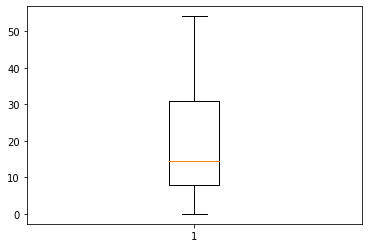

In [9]:
plt.boxplot(train['Fare'])
plt.show()

In [10]:
train_and_test = [train, test]

In [11]:
Q3 = train['Fare'].quantile(.75)
Q1 = train['Fare'].quantile(.25)
IQR = Q3 - Q1
print(Q3, Q1, IQR)

31.0 7.9104 23.0896


In [12]:
def get_catagory(fare):
    fare_band = ''
    
    if fare < Q1 : fare_band = 'S'
    elif fare < Q3 : fare_band = 'G'
    else : fare_band = 'P'

    return fare_band

for dataset in train_and_test:
    dataset['Fare_band'] = dataset['Fare'].apply(lambda x : get_catagory(x))

In [14]:
adjtrain = train.to_csv('C:/Users/JH/Desktop/adjtrain.csv',index = False)
adjtest = test.to_csv('C:/Users/JH/Desktop/adjtest.csv',index = False)